# EDA - 1

In [253]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
bike_df = pd.read_csv('BIKE DETAILS.csv')

In [3]:
bike_df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [5]:
bike_df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [6]:
bike_df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [7]:
bike_df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

1. What is the range of selling prices in the dataset.

In [8]:
max_price = bike_df['selling_price'].max()
min_price = bike_df['selling_price'].min()

In [9]:
selling_price_range = max_price - min_price

In [10]:
print(f"Range of selling price : {selling_price_range}")

Range of selling price : 755000


In [11]:
##Insights---A range of ₹755,000 for the selling prices in dataset indicates a significant spread in the prices of the bikes listed. 

2. What is the median selling price for bikes in the dataset.

In [12]:
median_selling_price = bike_df['selling_price'].median()

print(f'The median selling price is {median_selling_price}')

The median selling price is 45000.0


3. What is the most common seller type.

In [13]:
most_common_seller = bike_df['seller_type'].value_counts().idxmax()

print(f"The most common seller type is {most_common_seller}")

The most common seller type is Individual


4. How many bikes have driven more than 50,000 kilometers.

In [14]:
bike_driven  = bike_df[bike_df['km_driven'] >= 50000].shape[0]

print(f" The total number of bikes driven more than 50,000 km are {bike_driven}")

 The total number of bikes driven more than 50,000 km are 207


5. What is the average km_driven value for each ownership type.

In [15]:
bike_df.groupby('owner')['km_driven'].mean()

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [16]:
##Insights ---4th owner --This is a very high average, suggesting that the bikes owned by the 4th owner have been used extensively. This could indicate that these bikes are much older or have been passed through multiple owners and possibly have much higher mileage than others.

6. What proportion of bikes are from the year 2015 or older.

In [17]:
older_bikes = bike_df[bike_df['year'] <= 2015].shape[0]

print(f"The total number of bikes from year 2015 and older are {older_bikes} ")

The total number of bikes from year 2015 and older are 601 


7. What is the trend of missing values across the dataset.

In [18]:
missing_value = bike_df.isnull().sum()

missing_value

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [19]:
missing_value.index
missing_value.values

array([  0,   0,   0,   0,   0,   0, 435], dtype=int64)

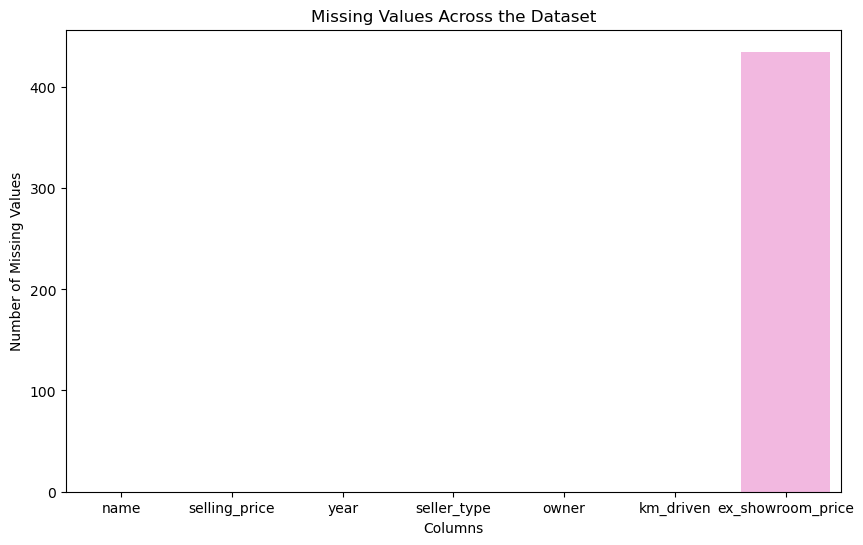

In [20]:
plt.figure(figsize = (10,6))
sns.barplot(x = missing_value.index, y = missing_value.values, palette = 'colorblind' )
plt.title('Missing Values Across the Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

In [21]:
##Insights ---Ex-showroom Price column has a significant number of missing values. There are more than 400 missing values and other column has 0 missing values.

8. What is the highest ex_showroom_price recorded, and for which bike.

In [22]:
max_exshowroom_price = bike_df['ex_showroom_price'].max()

In [23]:
name_with_max_exshowroom_price = bike_df[bike_df['ex_showroom_price'] == max_exshowroom_price]['name'].iloc[0]

In [24]:
print(f"The highest ex_showroom_price recorded is {max_exshowroom_price} with bike name {name_with_max_exshowroom_price}")

The highest ex_showroom_price recorded is 1278000.0 with bike name Harley-Davidson Street Bob


9. What is the total number of bikes listed by each seller type.

In [25]:
bike_df.groupby('seller_type').size()

seller_type
Dealer           6
Individual    1055
dtype: int64

In [26]:
## Insights --- It means that individual seller_type has listed more bikes than dealer.

10. What is the relationship between selling_price and km_driven for first-owner bikes.

In [27]:
first_owner_sellingprice = bike_df[bike_df['owner'] == '1st owner']

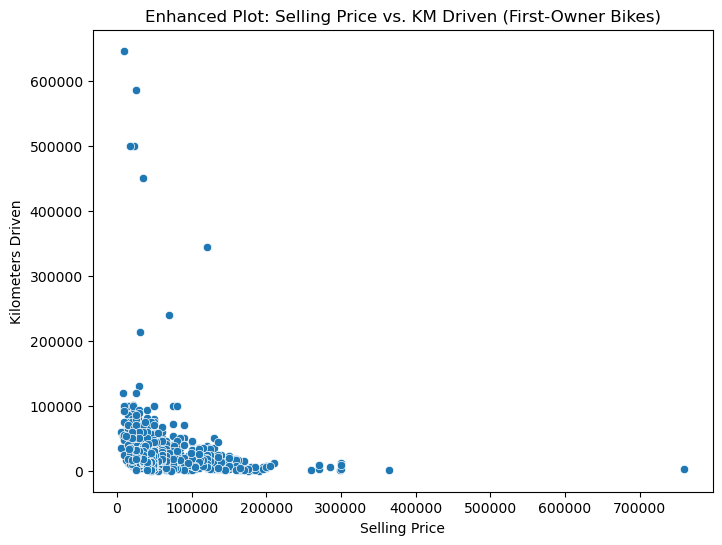

In [28]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = first_owner_sellingprice['selling_price'], y = first_owner_sellingprice['km_driven'])
plt.title('Enhanced Plot: Selling Price vs. KM Driven (First-Owner Bikes)')
plt.xlabel('Selling Price')
plt.ylabel('Kilometers Driven')
plt.show()

In [29]:
##Insights---The majority of the data points are clustered in the lower range of both selling_price (under ₹200,000) and km_driven (under 100,000 km).
#This suggests that most first-owner bikes are sold at lower prices and have relatively lower mileage.
#As the km_driven increases, the selling_price tends to decrease. This indicates a negative correlation—higher mileage typically reduces the selling price.
#The trend aligns with expectations, as higher usage (more kilometers driven) usually results in depreciation.

11.  Identify and remove outliers in the km_driven column using the IQR method.

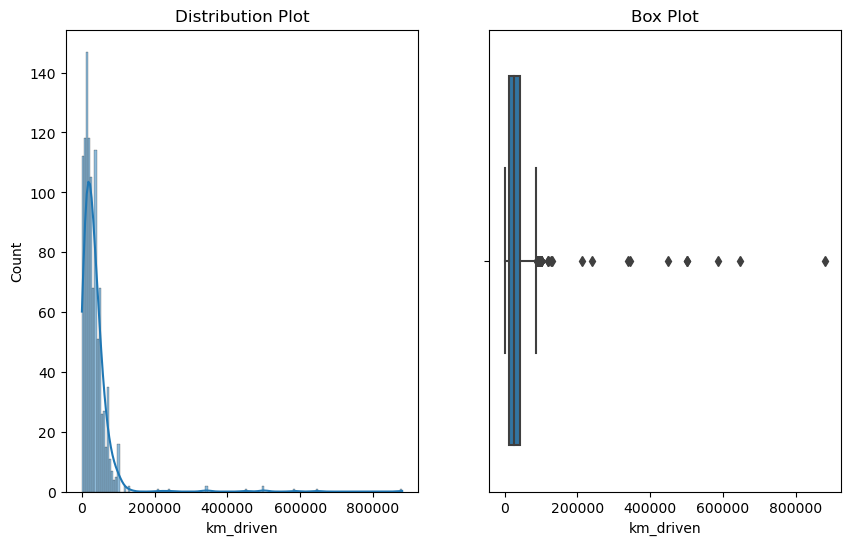

In [30]:
# using boxplot and disttribution plot to visualize the outlers in km_driven
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.histplot(x = 'km_driven', data = bike_df, palette = 'Set2',kde = True)
plt.title("Distribution Plot")

plt.subplot(1,2,2)
sns.boxplot(x = 'km_driven', data = bike_df)
plt.title("Box Plot")

plt.show()

In [31]:
q1 = bike_df['km_driven'].quantile(0.25)
q3 = bike_df['km_driven'].quantile(0.75)
IQR = q3 - q1

In [32]:
lower_whisker = q1 - 1.5*IQR
upper_whisker = q3 + 1.5*IQR

In [33]:
updated_bike_df = bike_df[bike_df['km_driven'] <= upper_whisker]

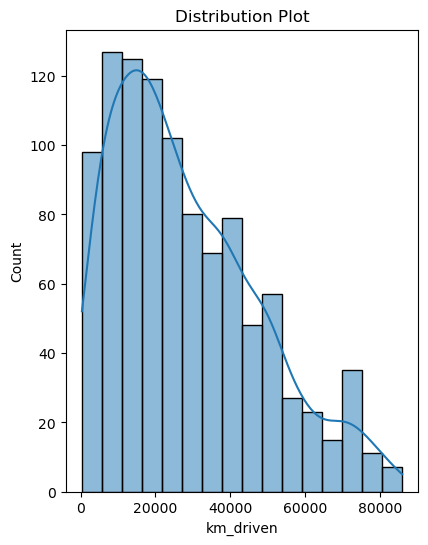

In [34]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.histplot(x = 'km_driven', data = updated_bike_df, palette = 'Set2',kde = True)
plt.title("Distribution Plot")

plt.show()

 12. Perform a bivariate analysis to visualize the relationship between year and selling_price

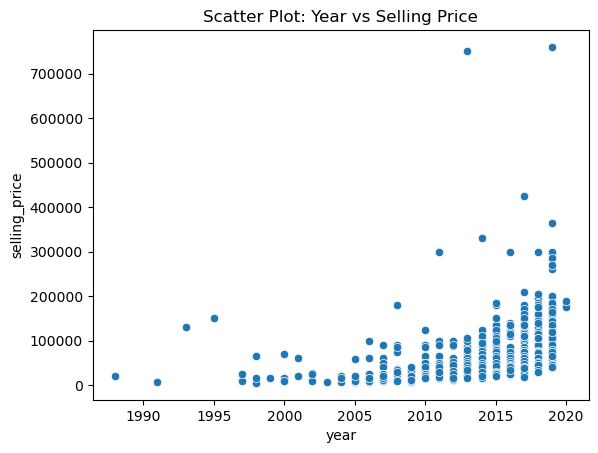

In [35]:
sns.scatterplot(x = 'year', y = 'selling_price', data = bike_df)
plt.title('Scatter Plot: Year vs Selling Price')
plt.show()

In [36]:
##Insight ---- There appears to be a general upward trend in selling prices over the years. This suggests that, on average, properties have been selling for higher prices over time.

13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing 
    year).

In [37]:
#assume current year is 2024
current_year = 2024

#add column age 
bike_df['age'] = current_year - bike_df['year']

#group by age and calculate avg selling price
avg_price_by_age = bike_df.groupby('age')['selling_price'].mean().reset_index()

In [38]:
avg_price_by_age['depreciation'] = avg_price_by_age['selling_price'].diff() / avg_price_by_age['age'].diff()

In [39]:
avg_price_by_age

,age,selling_price,depreciation
0,4,183333.333333,NaN
1,5,119689.511628,-63643.821705
2,6,87660.374046,-32029.137582
3,7,78894.736842,-8765.637204
4,8,58469.018692,-20425.718151
5,9,56500.000000,-1969.018692
6,10,48668.131868,-7831.868132
7,11,51136.986301,2468.854433
8,12,35748.400000,-15388.586301
9,13,35655.721311,-92.678689


In [40]:
##Insights --  Bikes lose a significant amount of value in their first 5–6 years. This is typical in most markets, where new vehicles (or products) lose value rapidly.

14. Which bike names are priced significantly above the average price for their manufacturing year.

In [41]:
avg_sellingprice_by_year =  bike_df.groupby('year')['selling_price'].mean()

In [42]:
avg_sellingprice_by_year

year
1988     20000.000000
1991      6000.000000
1993    130000.000000
1995    150000.000000
1997     17500.000000
1998     28333.333333
1999     15000.000000
2000     20833.333333
2001     40000.000000
2002     20666.666667
2003      8000.000000
2004     15100.000000
2005     16978.571429
2006     23380.000000
2007     24927.586207
2008     34289.285714
2009     22267.857143
2010     31793.333333
2011     35655.721311
2012     35748.400000
2013     51136.986301
2014     48668.131868
2015     56500.000000
2016     58469.018692
2017     78894.736842
2018     87660.374046
2019    119689.511628
2020    183333.333333
Name: selling_price, dtype: float64

In [43]:
above_avg_bikes = bike_df[bike_df['selling_price'] > bike_df['year'].map(avg_sellingprice_by_year)]

In [44]:
above_avg_bikes_names = above_avg_bikes['name'].unique()

In [45]:
above_avg_bikes_names

array(['Royal Enfield Classic 350', 'Royal Enfield Classic Gunmetal Grey',
       'Yamaha Fazer FI V 2.0 [2016-2018]',
       'Royal Enfield Bullet 350 [2007-2011]', 'Yamaha YZF R3', 'Jawa 42',
       'Hero Honda Glamour', 'Yamaha YZF R15 S', 'Yamaha FZ25',
       'Jawa Standard', 'Royal Enfield Thunderbird 350', 'Honda CBR-250R',
       'Bajaj Dominar 400', 'KTM 390 Duke', 'Yamaha FZ16',
       'Royal Enfield Electra 5 S', 'Hero Honda Passion Plus',
       'Royal Enfield Bullet 350', 'Bajaj Pulsar 150 [2001-2011]',
       'Hero Xtreme Sports', 'Honda CB Hornet 160R',
       'Royal Enfield Electra 4 S', 'Mahindra Mojo XT300',
       'Bajaj Pulsar AS200', 'Royal Enfield Thunderbird 350X',
       'Suzuki Intruder 150', 'Hero Honda Karizma ZMR [2010]',
       'Honda CB Unicorn 150', 'Hero Honda CD Deluxe',
       'Royal Enfield Classic Desert Storm', 'TVS Apache RTR 200 4V',
       'UM Renegade Commando', 'Royal Enfield Continental GT 650',
       'Honda Activa 3G', 'Harley-Davidson Stree

15.  Develop a correlation matrix for numeric columns and visualize it using a heatmap.

In [46]:
numeric_bike_df = bike_df.select_dtypes(include = 'number')

In [47]:
numeric_bike_df

,selling_price,year,km_driven,ex_showroom_price,age
0,175000,2019,350,NaN,5
1,45000,2017,5650,NaN,7
2,150000,2018,12000,148114.0,6
3,65000,2015,23000,89643.0,9
4,20000,2011,21000,NaN,13
...,...,...,...,...,...
1056,17000,2010,500000,52000.0,14
1057,16000,2012,33000,51000.0,12
1058,15000,2013,35000,57000.0,11
1059,12000,2009,53000,58000.0,15


In [48]:
corr_matrix = numeric_bike_df.corr()

In [49]:
corr_matrix

,selling_price,year,km_driven,ex_showroom_price,age
selling_price,1.000000,0.402188,-0.212937,0.918583,-0.402188
year,0.402188,1.000000,-0.288675,0.126378,-1.000000
km_driven,-0.212937,-0.288675,1.000000,-0.122011,0.288675
ex_showroom_price,0.918583,0.126378,-0.122011,1.000000,-0.126378
age,-0.402188,-1.000000,0.288675,-0.126378,1.000000


<Axes: >

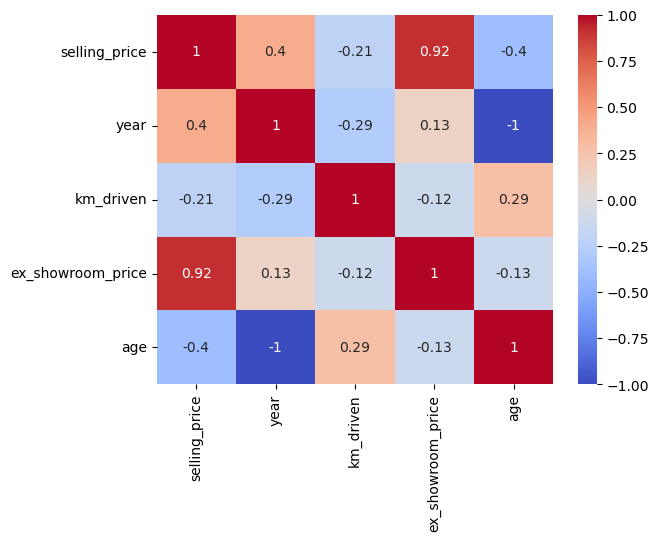

In [50]:
sns.heatmap(data = corr_matrix, annot = True ,cmap = 'coolwarm')

# EDA - 2

In [51]:
car_df = pd.read_csv("Car Sale.csv")

In [52]:
car_df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [53]:
car_df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [54]:
car_df.shape

(23906, 16)

In [55]:
car_df.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [56]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [57]:
car_df.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

1. What is the average selling price of cars for each dealer, and how does it compare across different dealers.

In [58]:
avg_price_by_dealer = car_df.groupby('Dealer_Name')['Price ($)'].mean()

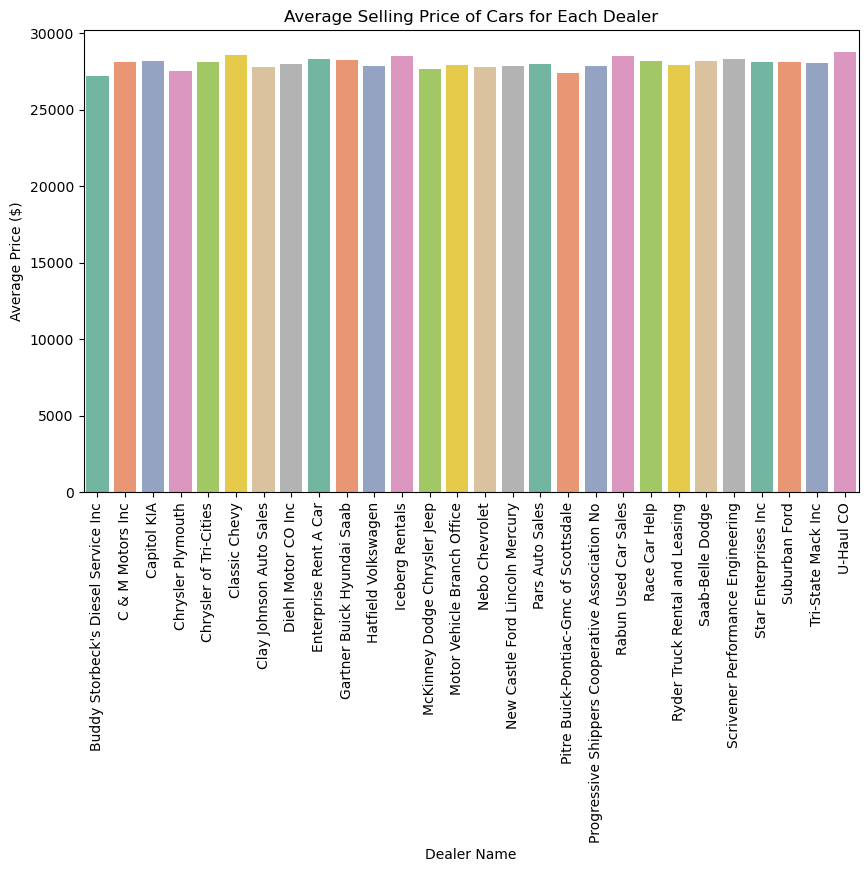

In [59]:
#visualize to compare across different dealers.

plt.figure(figsize =(10,6))
sns.barplot(x = avg_price_by_dealer.index, y = avg_price_by_dealer.values, palette = 'Set2')
plt.xlabel('Dealer Name')
plt.ylabel('Average Price ($)')
plt.title('Average Selling Price of Cars for Each Dealer')
plt.xticks(rotation = 90)
plt.show()

2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing 
   trends.

In [60]:
highest_price_var_by_brand = car_df.groupby('Company')['Price ($)'].std().idxmax()

In [61]:
highest_price_var_by_brand

'Lincoln'

In [62]:
##insghts -- lincoln car brand with the highest variation in prices likely has a wide range of car models, which might include both older used cars (which are cheaper) and newer, higher-end cars (which are more expensive).
#The pricing trends for that brand reflect a diverse product range, targeting different customer segments with varying budgets.

3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges 
   compare

In [63]:
car_df.Transmission.unique()

array(['Auto', 'Manual'], dtype=object)

In [64]:
car_df.groupby('Transmission').size()

Transmission
Auto      12571
Manual    11335
dtype: int64

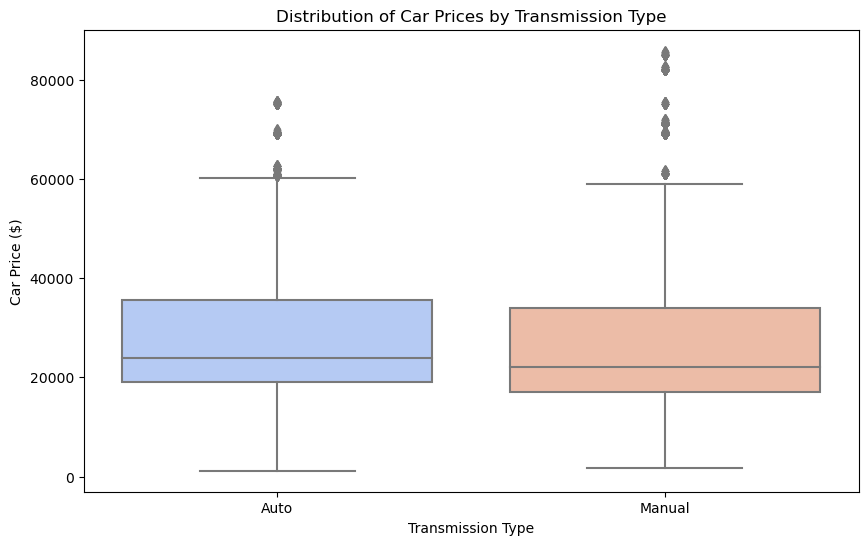

In [65]:
#to visualize the distribution of car prices for each transmission type

plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=car_df, palette='coolwarm')
plt.xlabel('Transmission Type')
plt.ylabel('Car Price ($)')
plt.title('Distribution of Car Prices by Transmission Type')
plt.show()


In [66]:
#Insights --- Interquartile Range (IQR) (Box Length):

#Auto Transmission: The box for automatic cars is larger, meaning the prices are more spread out (higher variation in prices). This indicates that automatic cars include both affordable and premium models.
#Manual Transmission: The box is smaller, which means the prices are more consistent for manual transmission cars.



4.  What is the distribution of car prices across different regions.

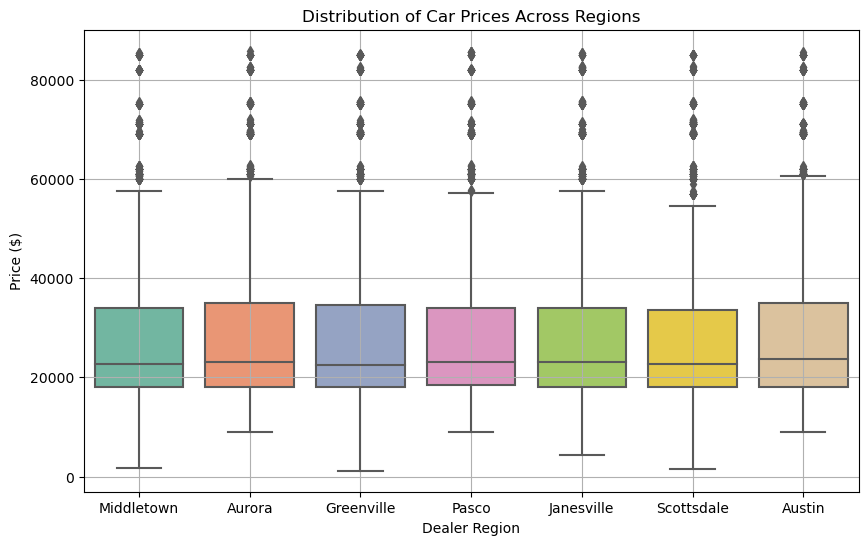

In [67]:
plt.figure(figsize= (10,6))
sns.boxplot(x = 'Dealer_Region', y = 'Price ($)', data = car_df, palette = 'Set2' )
plt.title('Distribution of Car Prices Across Regions')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.grid()
plt.show()

5. What is the distribution of cars based on body styles.

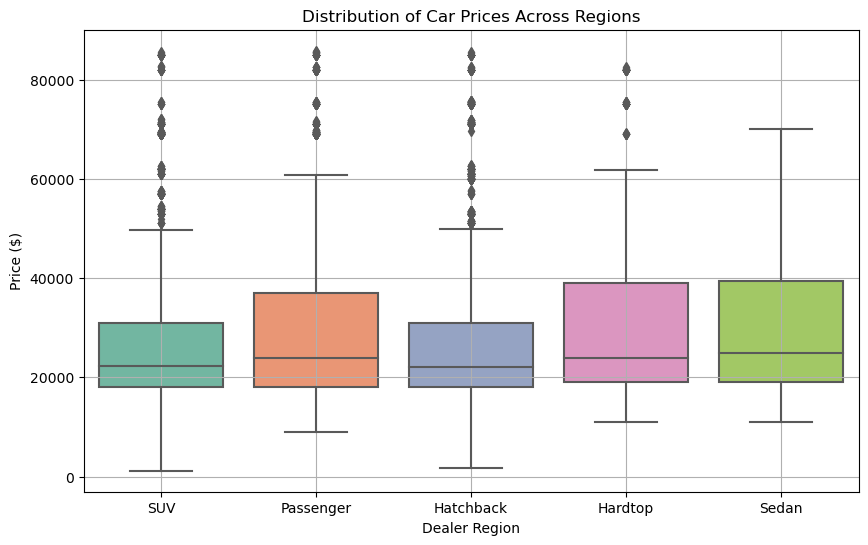

In [68]:
plt.figure(figsize= (10,6))
sns.boxplot(x = 'Body Style', y = 'Price ($)', data = car_df, palette = 'Set2' )
plt.title('Distribution of Car Prices Across Regions')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.grid()
plt.show()

6. How does the average selling price of cars vary by customer gender and annual income.

In [69]:
avg_price_by_gender_income = car_df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean()

In [70]:
avg_price_by_gender_income

Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64

<Axes: xlabel='Annual Income', ylabel='Price ($)'>

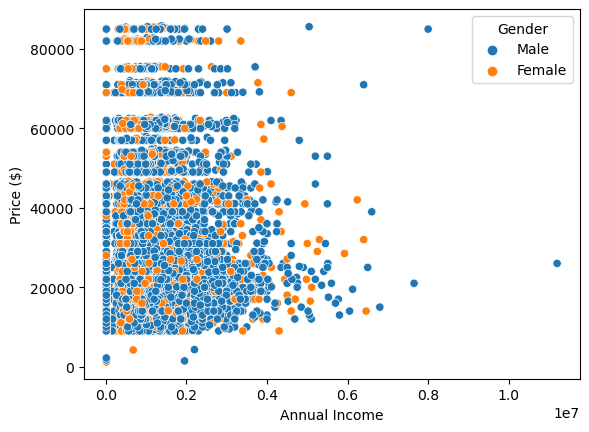

In [71]:
sns.scatterplot(x = 'Annual Income', y = 'Price ($)', data = car_df, hue = 'Gender')

In [72]:
##Insights --- The scatterplot suggests that car prices do not strongly correlate with annual income.
#The distribution for male and female customers is quite similar, implying that gender may not be a significant factor in determining car prices.

7. What is the distribution of car prices by region, and how does the number of cars sold vary by region.

In [73]:
car_df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

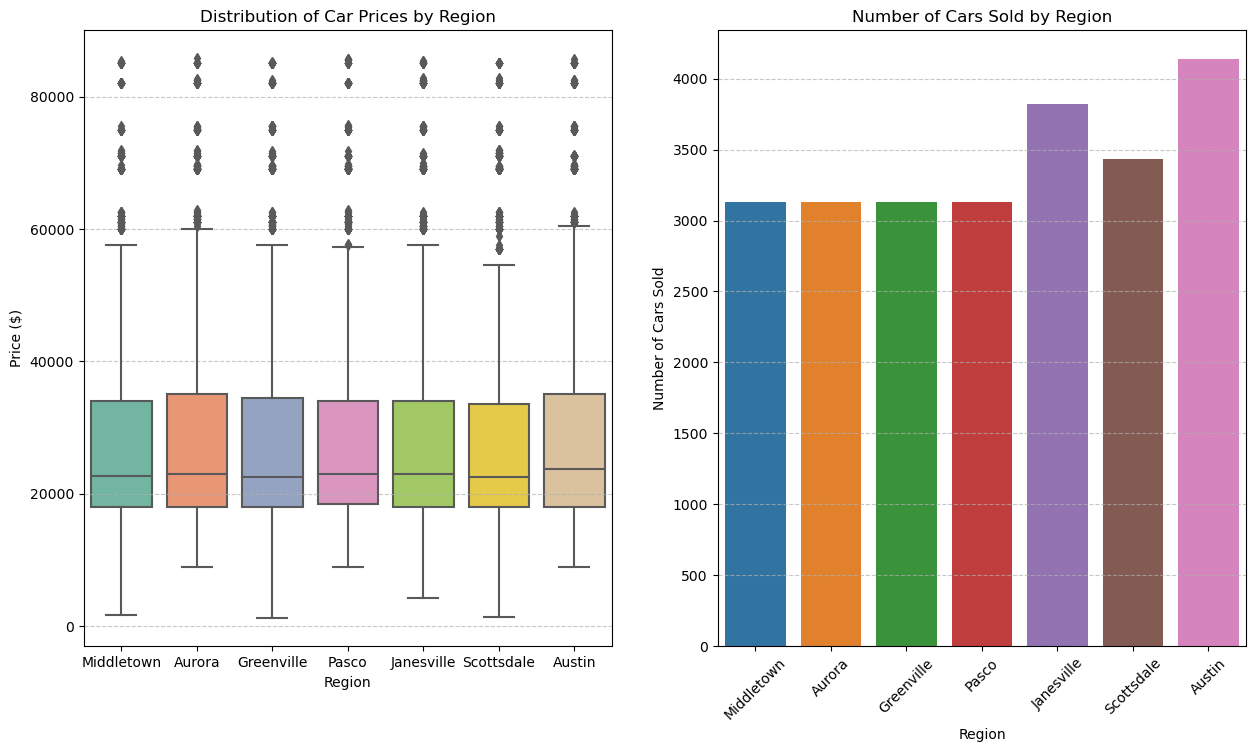

In [74]:
# to visualize distribution of Car Prices by Region

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.boxplot(x = 'Dealer_Region' , y = 'Price ($)', data =  car_df, palette = 'Set2')
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# to visualize count of cars sold in each region.
plt.subplot(1,2,2)
sns.countplot(x = 'Dealer_Region', data = car_df)
plt.title('Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

8. How does the average car price differ between cars with different engine sizes.

In [75]:
avg_price_by_engine = car_df.groupby('Engine')['Price ($)'].mean()

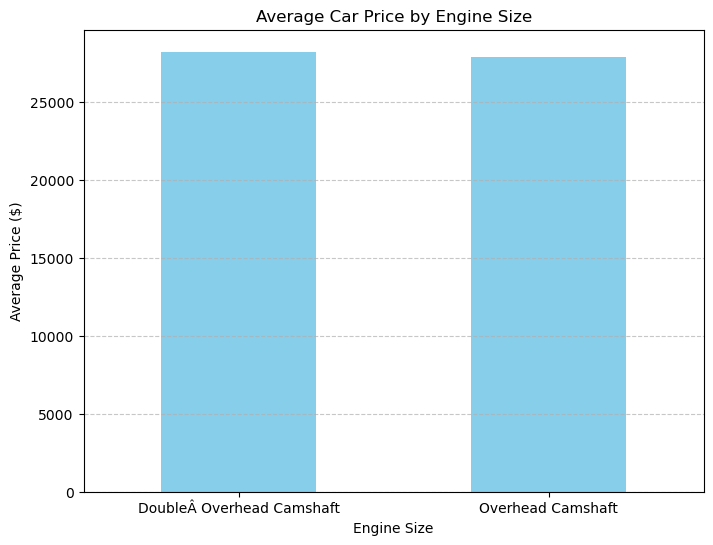

In [76]:
#To visualize-
avg_price_by_engine.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

9.  How do car prices vary based on the customer’s annual income bracket.

In [77]:
car_df['Annual Income']

0          13500
1        1480000
2        1035000
3          13500
4        1465000
          ...   
23901      13500
23902     900000
23903     705000
23904      13500
23905    1225000
Name: Annual Income, Length: 23906, dtype: int64

In [78]:
max_income = car_df['Annual Income'].max()
min_income = car_df['Annual Income'].min()

In [79]:
max_income, min_income

(11200000, 10080)

In [80]:
# Define bins and labels
bins = [0, 50000, 200000, 1000000, 5000000, 11200000]
labels = ['<50k', '50k-200k', '200k-1M', '1M-5M', '>5M']

# Create a new column for income brackets
car_df['Income Brackets'] = pd.cut(x = car_df['Annual Income'], bins = bins, labels = labels)

In [81]:
car_df[['Annual Income', 'Income Brackets']]

,Annual Income,Income Brackets
0,13500,<50k
1,1480000,1M-5M
2,1035000,1M-5M
3,13500,<50k
4,1465000,1M-5M
...,...,...
23901,13500,<50k
23902,900000,200k-1M
23903,705000,200k-1M
23904,13500,<50k


In [82]:
avg_price_by_income = car_df.groupby('Income Brackets')['Price ($)'].mean()

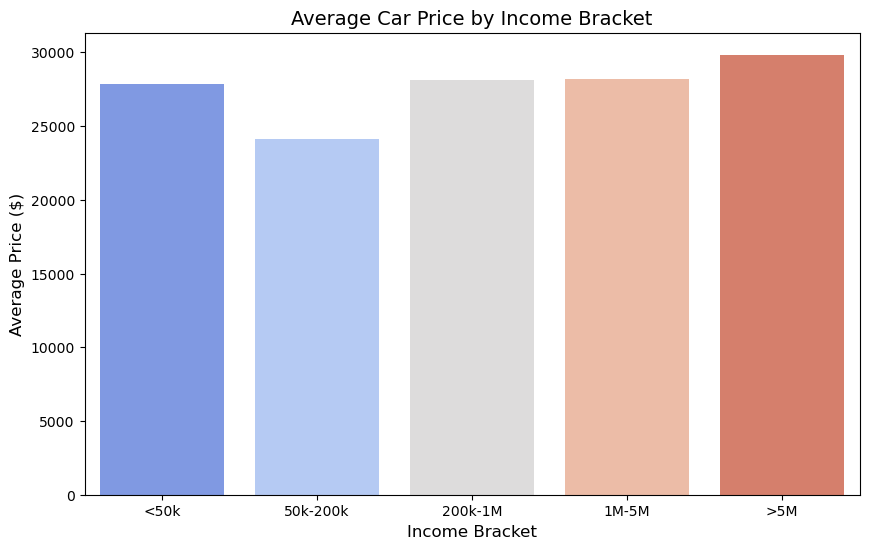

In [83]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_income.index, y=avg_price_by_income.values, palette="coolwarm")
plt.title('Average Car Price by Income Bracket', fontsize=14)
plt.xlabel('Income Bracket', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.show()

10.  What are the top 5 car models with the highest number of sales, and how does their price distribution look.

In [84]:
top5_models = car_df.Model.value_counts().head(5)

In [85]:
#to visualize price distribution look
top5_models_data = car_df[car_df['Model'].isin(top5_models.index)]

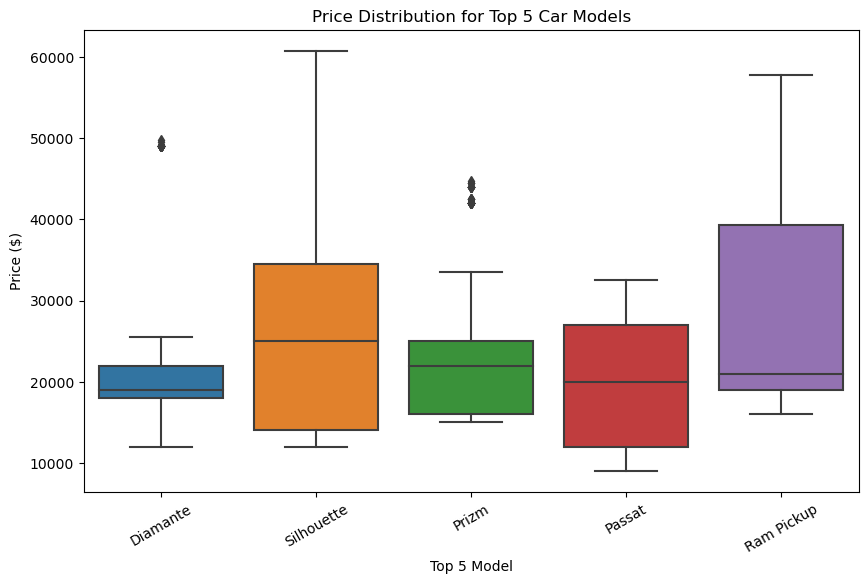

In [86]:
# Create the boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x = 'Model', y = 'Price ($)', data = top5_models_data, order = top5_models.index)
plt.title('Price Distribution for Top 5 Car Models')
plt.xlabel('Top 5 Model')
plt.xticks(rotation=30)
plt.show()

In [87]:
top5_models.index

Index(['Diamante', 'Silhouette', 'Prizm', 'Passat', 'Ram Pickup'], dtype='object', name='Model')

11. How does car price vary with engine size across different car colors, and which colors have the highest price 
    variation.

In [88]:
#for car price vary with engine size across different car colors
price_by_engine_colors = car_df.groupby(['Engine','Color'])['Price ($)'].mean().reset_index()

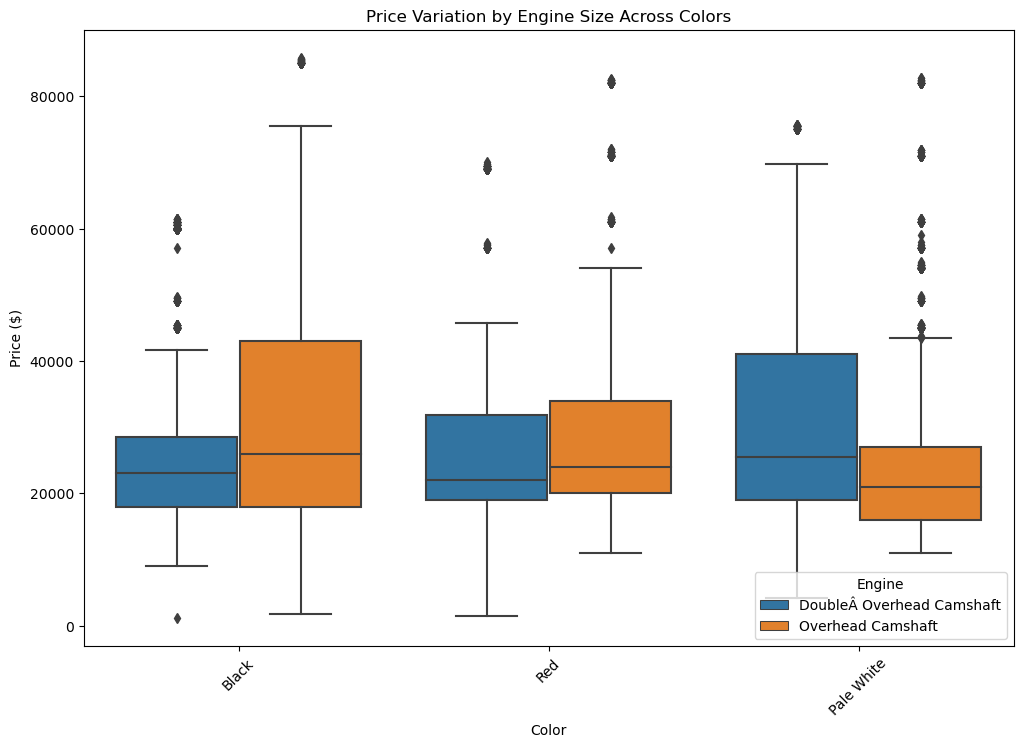

In [89]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=car_df, x='Color', y='Price ($)', hue='Engine')
plt.title('Price Variation by Engine Size Across Colors')
plt.xticks(rotation=45)
plt.show()

In [90]:
#to visualize which colors have the highest price variation
color_price_variation = car_df.groupby('Color')['Price ($)'].std().sort_values(ascending = False)

In [91]:
color_price_variation

Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64

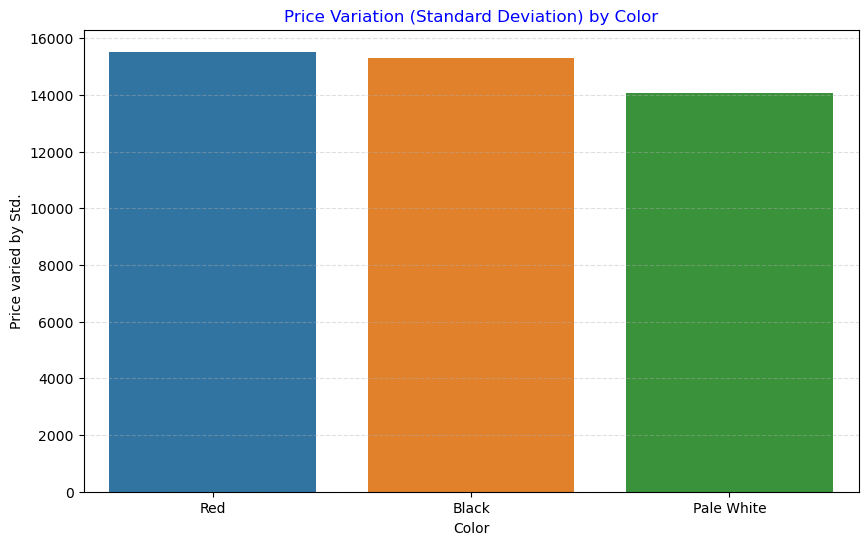

In [92]:
plt.figure(figsize = (10,6))
sns.barplot(x = color_price_variation.index, y = color_price_variation.values)
plt.title('Price Variation (Standard Deviation) by Color', color = 'blue')
plt.xlabel('Color')
plt.ylabel('Price varied by Std.')
plt.grid(axis = 'y', alpha = 0.4, linestyle = '--')
plt.show()

12. Is there any seasonal trend in car sales based on the date of sale.

In [93]:
# convert to datetime format
car_df['Date'] = pd.to_datetime(car_df['Date'], format='%m/%d/%Y')

# Extract year and month from the date
car_df['year'] = car_df['Date'].dt.year
car_df['month'] = car_df['Date'].dt.month

In [94]:
#Group the data by year and month to get the total sales for each month in each year.
monthly_sales = car_df.groupby(['year','month']).size().reset_index(name='sales')

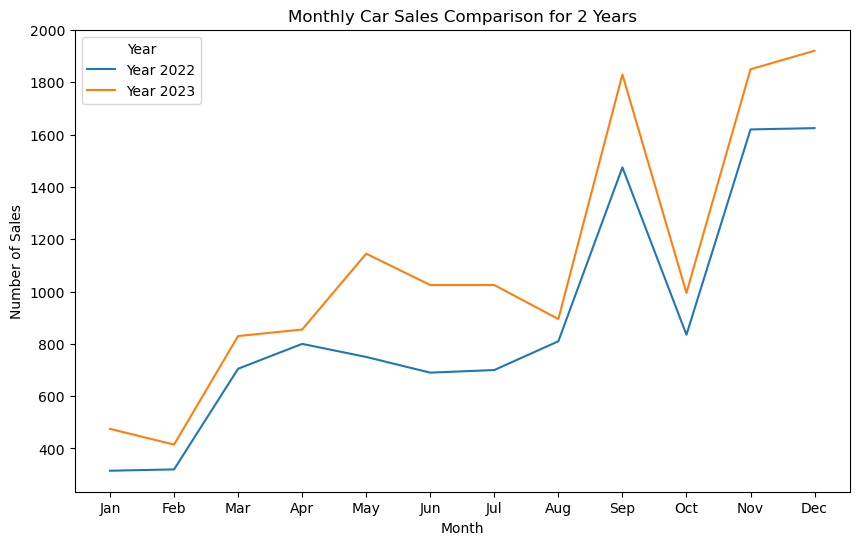

In [95]:
# Plot sales comparison for each year
plt.figure(figsize=(10, 6))
for year in monthly_sales['year'].unique():
    sales_by_month = monthly_sales[monthly_sales['year'] == year]
    plt.plot(sales_by_month['month'], sales_by_month['sales'], label=f'Year {year}')
    
plt.title('Monthly Car Sales Comparison for 2 Years')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.legend(title="Year")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [96]:
#Insights --Seasonality: Car sales appear to be higher during certain months, with peaks in the middle of the year (especially in July and August) and dips at the start and end of the year.
#Year-on-Year Comparison: The trends for 2023 show higher sales than 2022, particularly in the middle months, suggesting stronger demand or successful sales initiatives in 2023.

13. How does the car price distribution change when considering different combinations of body style and 
    transmission type.

In [97]:
# Grouping the data by body style and transmission type, and then calculating the price distribution
grouped_data = car_df.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()

In [98]:
grouped_data

count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15440.056434  11000.0  19001.0   

                             50%      75%      max  
Body Style Transmission                             
Hardtop    Auto          27000.0  43125.0  75501.0  
           Manual        22001.0  29000.0  82500.0  
Hatchback  Auto          21500.0  31000.0  75700.0  
           Manual        23000.0  36001.0  85600.0  
Passenger  Auto          25000.0  38000.0  69801.0  
           Manual        22000.0  37000.0  85800.0  
SUV        Auto          25000.0  33000.0  75501.0  
           Manual        22000.0  28000.0  85500.0  
Sedan      Auto          26000.0  39500.0  69980.0  
           Manual        25000.0  36600.0  69700.0

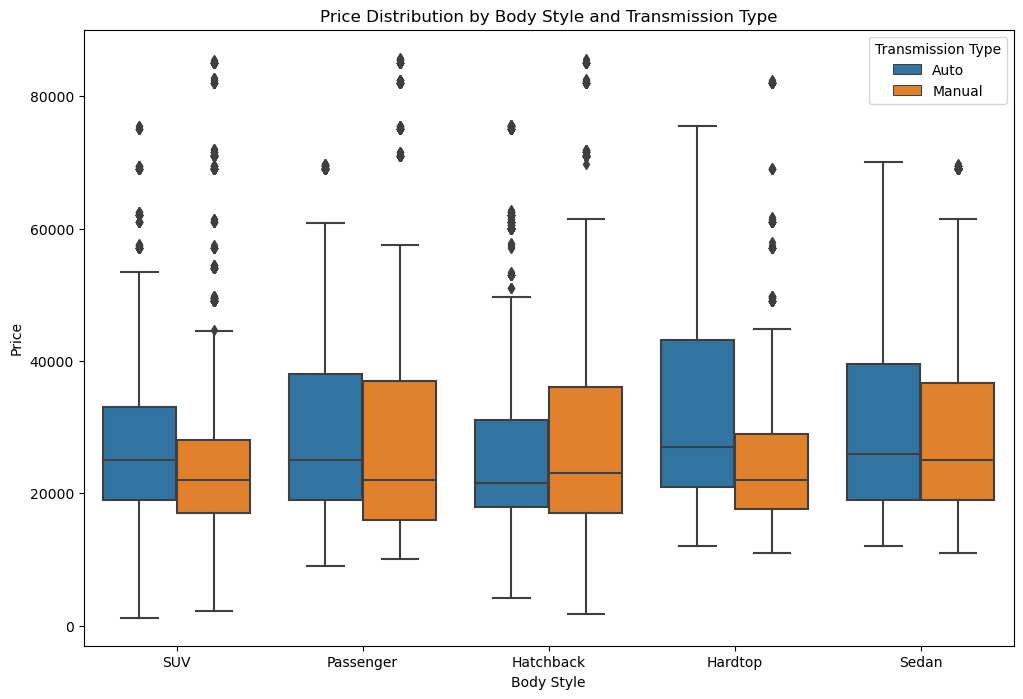

In [99]:
# Create a boxplot to visualize price distribution across different body styles and transmission types
plt.figure(figsize=(12, 8))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=car_df)
plt.title('Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price')
plt.legend(title='Transmission Type')
plt.show()


14. What is the correlation between car price, engine size, and annual income of customers, and how do these 
    features interact.

In [100]:
corr_price_engine_income = car_df[['Price ($)', 'Engine', 'Annual Income']]

In [102]:
# Scatter plots to visualize pairwise relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine', y='Price ($)', data=car_df, hue='Annual Income', palette = 'colorblind')
plt.title('Car Price vs Engine Size with Annual Income')
plt.xlabel('Engine Size')
plt.ylabel('Car Price')
plt.show()

# Pair plot to visualize relationships between all features
sns.pairplot(car_df[['Price ($)', 'Engine', 'Annual Income']])
plt.show()

KeyboardInterrupt: 

15. How does the average car price vary across different car models and engine types?

In [103]:
# Group the data by 'car_model' and 'engine_type' and calculate the average price
average_price_by_model_engine = car_df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
average_price_by_model_engine

,Model,Engine,Price ($)
0,3-Sep,DoubleÂ Overhead Camshaft,37986.380117
1,3000GT,DoubleÂ Overhead Camshaft,22764.326923
2,3000GT,Overhead Camshaft,21770.659864
3,300M,DoubleÂ Overhead Camshaft,21394.888889
4,323i,DoubleÂ Overhead Camshaft,16744.632287
...,...,...,...
256,Windstar,Overhead Camshaft,17100.272727
257,Wrangler,DoubleÂ Overhead Camshaft,21145.294737
258,Wrangler,Overhead Camshaft,18742.942029
259,Xterra,DoubleÂ Overhead Camshaft,15940.459459


# EDA - 3

In [104]:
amazon_df = pd.read_csv('amazon.csv')
amazon_df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [105]:
amazon_df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [106]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [107]:
amazon_df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

1. What is the average rating for each product category.

In [250]:
avg_rating_by_pro_cat = amazon_df.groupby('category')['rating'].mean()
#error -- Could not convert 4.34.0 to numeric

In [109]:
amazon_df['rating'] = amazon_df['rating'].str.replace('4.34.0', '4.3').str.replace('""', "4.3")

In [110]:
avg_rating_by_pro_cat = amazon_df.groupby('category')['rating'].mean()

TypeError: Could not convert 4.34.0 to numeric

In [111]:
amazon_df.rating.unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [112]:
amazon_df['rating'] = amazon_df['rating'].astype(float)

ValueError: could not convert string to float: '|'

In [113]:
amazon_df.rating.dtype

dtype('O')

In [251]:
avg_rating_by_pro_cat = amazon_df.groupby('category')['rating'].mean().reset_index()

In [252]:
avg_rating_by_pro_cat

,category,rating
0,Car&Motorbike|CarAccessories|InteriorAccessori...,3.800000
1,Computers&Accessories|Accessories&Peripherals|...,4.150000
2,Computers&Accessories|Accessories&Peripherals|...,3.500000
3,Computers&Accessories|Accessories&Peripherals|...,3.600000
4,Computers&Accessories|Accessories&Peripherals|...,4.050000
...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.250000
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.150000
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.300000
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.133333


2. What are the top rating_count products by category.

In [116]:
amazon_df.groupby('category').apply(lambda x : x.nlargest(1, 'rating_count')).reset_index(drop = True)

TypeError: Column 'rating_count' has dtype object, cannot use method 'nlargest' with this dtype

In [118]:
amazon_df['rating_count'] = amazon_df['rating_count'].astype(float)

In [119]:
amazon_df['rating_count'] = amazon_df['rating_count'].str.replace(',','')

AttributeError: Can only use .str accessor with string values!

In [120]:
amazon_df['rating_count'] = amazon_df['rating_count'].astype(float)

In [121]:
amazon_df.groupby('category').apply(lambda x : x.nlargest(1, 'rating_count')).reset_index(drop = True)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B0912WJ87V,Reffair AX30 [MAX] Portable Air Purifier for C...,Car&Motorbike|CarAccessories|InteriorAccessori...,"₹2,339","₹4,000",42%,3.8,1118.0,[NEW LAUNCH - INNOVATIVE DESIGN] EFFICIENT PUR...,"AG6W5HESRSDLBX3NCYOOUGFOWERA,AED4U5CF37HVSYPMD...","Arivazhagan,Ajit,swanand pandit,Venkatesh S.,S...","R3TOOFPX256D59,R1PR50BDQOEIIO,R392FI4QWXWOX5,R...","Liked it,User friendly and effective,Not as pe...","As of now its working fine, but don't expect m...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Reffair-AX30-MAX-Interna...
1,B097C564GC,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",Computers&Accessories|Accessories&Peripherals|...,₹294,"₹4,999",94%,4.3,4426.0,【WIDER COMPATIBILITY】This USB C Female to USB ...,"AGO5SRT3ESLNL5WTRQFD5BSIYPQA,AGGNODUMRADB3PQQT...","Naga Sai Gadagottu,Neha Sharma,Amazon Customer...","R3CUNCZTU43JPP,RSO46BN8S4OSU,R2UD5D7T4DZRE5,R2...","Tiny helping hand,Good product,As a whole good...",This eliminates the need to buy chargers for t...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/rts-Adapter-Charging-Con...
2,B009LJ2BXA,Hp Wired On Ear Headphones With Mic With 3.5 M...,Computers&Accessories|Accessories&Peripherals|...,₹649,₹999,35%,3.5,7222.0,Powerful bass and clear treble sounds|Wired co...,"AFIZUD4UBB67LGWY6CVLRHKA75IA,AG2TD3527KNZZNE46...","Deepthi,Nitin Mishra,Raju Chacko,A.VISWANATHAR...","R392ZYXC6D3GY0,R1MJHZXZ09ETAE,R20PJKJTCF9RXN,R...","Headset,Overall a good product. Sound quality ...","Not a perfect fit for long usage,One problem y...",https://m.media-amazon.com/images/I/31eE6slx4E...,https://www.amazon.in/HP-B4B09PA-Headphones-wi...
3,B08SCCG9D4,JBL Commercial CSLM20B Auxiliary Omnidirection...,Computers&Accessories|Accessories&Peripherals|...,₹949,"₹2,000",53%,3.9,14969.0,Omnidirectional pickup pattern|3.5mm TRRS jack...,"AFROXVCIF6PZXFXLS7DLTPT2CGCQ,AHA4ODJMDNBNUVEUS...","Ansh KaTariA,Saqlain Shaikh,Sardar V.,Rushikes...","R20M6JOASW88SS,RPM4RV2MQNNN0,R19KRP5SDTN2NL,R1...","It's just good !,Good for WFH,Works according ...",It just good for beginners you can start your ...,https://m.media-amazon.com/images/I/41U9-x0JGP...,https://www.amazon.in/JBL-Commercial-Omnidirec...
4,B08K9PX15C,Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...,Computers&Accessories|Accessories&Peripherals|...,₹849,"₹1,499",43%,4.0,7352.0,The 2.0 speaker has a versatile design that ca...,"AFC7Q5Q64XM2Y64FT7Y3L2YVALRA,AG7C5TFPIBMWQQC2S...","Balamurugan Trivandrum,prathmesh sawant,Pravee...","R2USVKN5VQX7ZL,R36O11JTBG8NKH,R1OC5OKQ1ZHRT4,R...",Nice product from Zebronics... Using for lapto...,Zebronics Product is always good. I bought thi...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Zebronics-Wonderbar-Powe...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,B07KCMR8D6,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,OfficeProducts|OfficePaperProducts|Paper|Stati...,₹50,₹50,0%,4.3,5792.0,5 vibrant Neon body color|Smooth and fast writ...,"AEVPRYZLGHNMEZA5BYGIX36LYZXA,AEZPOZQEEBFFXZ2EQ...","Gatij saini,Biswajit Kundu,Altaf Khan,Agam Sar...","RZAAQFY7BDSWC,R3604ZO2AA4PK5,R3C8K6Z6W9MDTQ,R3...","Nice ball pen,Good product,Average,Nice Pen,It...","Very nice ball pen,Thank you Amazon,Easy to ho...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Classmate-Octane-Neon-Pa...
207,B00S2SEV7K,"Pilot Frixion Clicker Roller Pen (Blue), (9000...",OfficeProducts|OfficePaperProducts|Paper|Stati...,₹90,₹100,10%,4.1,6199.0,Unique patented thermo-sensitive Frixion Ink|A...,"AFSJUWV2I4CD53EPCRMOQJ3CWR3Q,AGLYAYWTFPPMLELDG...","Abhay Gupta,vimal rastogi,Sughnesha,Prityush,A...","R1QL22IXTM3HYM,R2BCCQQCMW4X56,R8MW9P91PIMJ3,R1...","Good... 😊,Nice pen but it has some problems.,A...",Bahut aacha hai ye pen sach me likh

3. What is the distribution of discounted prices vs. actual prices.

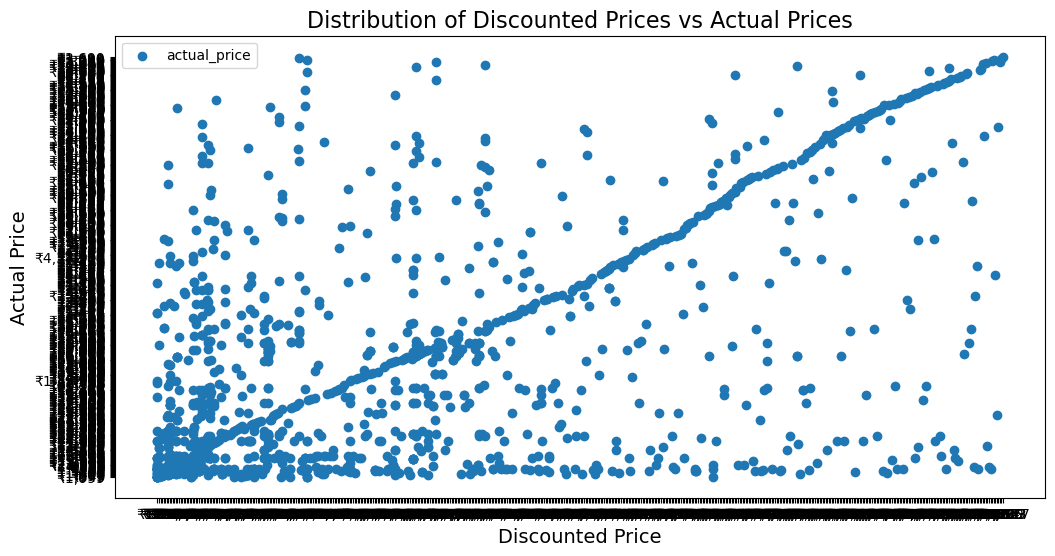

In [126]:
# Plot histograms for discounted and actual prices
plt.figure(figsize=(12,6))
plt.scatter('discounted_price', 'actual_price', data = amazon_df)
plt.title('Distribution of Discounted Prices vs Actual Prices', fontsize=16)
plt.xlabel('Discounted Price', fontsize=14)
plt.ylabel('Actual Price', fontsize=14)
plt.legend()
plt.show()


#Insights ---Positive Correlation: There's a clear positive correlation between discounted prices and actual prices. This means that, generally, as the actual price of a product increases, so does its discounted price.

4. How does the average discount percentage vary across categories

In [130]:
amazon_df.discounted_price.unique()

array(['₹399', '₹199', '₹329', '₹154', '₹149', '₹176.63', '₹229', '₹499',
       '₹299', '₹219', '₹350', '₹159', '₹349', '₹13,999', '₹249',
       '₹13,490', '₹970', '₹279', '₹59', '₹11,499', '₹14,999', '₹179',
       '₹389', '₹599', '₹99', '₹899', '₹32,999', '₹209', '₹19,999',
       '₹999', '₹333', '₹507', '₹309', '₹1,199', '₹799', '₹6,999', '₹230',
       '₹649', '₹15,999', '₹348', '₹32,990', '₹139', '₹263', '₹7,999',
       '₹1,599', '₹26,999', '₹115', '₹10,901', '₹1,434', '₹7,299', '₹325',
       '₹29,999', '₹27,999', '₹30,990', '₹269', '₹24,999', '₹18,990',
       '₹290', '₹345', '₹1,099', '₹719', '₹849', '₹21,999', '₹449',
       '₹37,999', '₹7,390', '₹273.10', '₹15,990', '₹210', '₹1,299',
       '₹347', '₹228', '₹1,499', '₹8,499', '₹20,990', '₹9,999', '₹489',
       '₹23,999', '₹689', '₹1,699', '₹655', '₹749', '₹195', '₹416',
       '₹368', '₹29,990', '₹339', '₹15,490', '₹9,490', '₹637', '₹1,089',
       '₹12,499', '₹1,399', '₹88', '₹57.89', '₹205', '₹949', '₹379',
       '₹8,9

In [135]:
amazon_df['discounted_price'] = amazon_df['discounted_price'].str.replace(',','')

In [140]:
amazon_df.discounted_price.unique()

array(['₹399', '₹199', '₹329', '₹154', '₹149', '₹176.63', '₹229', '₹499',
       '₹299', '₹219', '₹350', '₹159', '₹349', '₹13999', '₹249', '₹13490',
       '₹970', '₹279', '₹59', '₹11499', '₹14999', '₹179', '₹389', '₹599',
       '₹99', '₹899', '₹32999', '₹209', '₹19999', '₹999', '₹333', '₹507',
       '₹309', '₹1199', '₹799', '₹6999', '₹230', '₹649', '₹15999', '₹348',
       '₹32990', '₹139', '₹263', '₹7999', '₹1599', '₹26999', '₹115',
       '₹10901', '₹1434', '₹7299', '₹325', '₹29999', '₹27999', '₹30990',
       '₹269', '₹24999', '₹18990', '₹290', '₹345', '₹1099', '₹719',
       '₹849', '₹21999', '₹449', '₹37999', '₹7390', '₹273.10', '₹15990',
       '₹210', '₹1299', '₹347', '₹228', '₹1499', '₹8499', '₹20990',
       '₹9999', '₹489', '₹23999', '₹689', '₹1699', '₹655', '₹749', '₹195',
       '₹416', '₹368', '₹29990', '₹339', '₹15490', '₹9490', '₹637',
       '₹1089', '₹12499', '₹1399', '₹88', '₹57.89', '₹205', '₹949',
       '₹379', '₹8990', '₹486', '₹5699', '₹709', '₹47990', '₹320',

In [141]:
amazon_df.discounted_price  = amazon_df.discounted_price.str.replace(r'₹', '', regex=True)

In [142]:
amazon_df.discounted_price.unique()

array(['399', '199', '329', '154', '149', '176.63', '229', '499', '299',
       '219', '350', '159', '349', '13999', '249', '13490', '970', '279',
       '59', '11499', '14999', '179', '389', '599', '99', '899', '32999',
       '209', '19999', '999', '333', '507', '309', '1199', '799', '6999',
       '230', '649', '15999', '348', '32990', '139', '263', '7999',
       '1599', '26999', '115', '10901', '1434', '7299', '325', '29999',
       '27999', '30990', '269', '24999', '18990', '290', '345', '1099',
       '719', '849', '21999', '449', '37999', '7390', '273.10', '15990',
       '210', '1299', '347', '228', '1499', '8499', '20990', '9999',
       '489', '23999', '689', '1699', '655', '749', '195', '416', '368',
       '29990', '339', '15490', '9490', '637', '1089', '12499', '1399',
       '88', '57.89', '205', '949', '379', '8990', '486', '5699', '709',
       '47990', '320', '129', '225', '547', '259', '239', '467', '11990',
       '252', '204', '6490', '235', '42999', '173', '848.99

In [143]:
amazon_df.discounted_price = pd.to_numeric(amazon_df['discounted_price'])

In [144]:
amazon_df.discounted_price.dtype

dtype('float64')

In [148]:
amazon_df.actual_price.unique()

array(['₹1,099', '₹349', '₹1,899', '₹699', '₹399', '₹1,000', '₹499',
       '₹299', '₹999', '₹339', '₹799', '₹700', '₹899', '₹24,999',
       '₹21,990', '₹1,799', '₹22,900', '₹199', '₹19,990', '₹19,999',
       '₹1,999', '₹750', '₹599', '₹666.66', '₹1,900', '₹45,999', '₹695',
       '₹34,999', '₹1,599', '₹1,208', '₹475', '₹395', '₹2,199', '₹500',
       '₹2,100', '₹12,999', '₹1,399', '₹21,999', '₹1,499', '₹47,900',
       '₹845', '₹1,400', '₹14,990', '₹2,999', '₹42,999', '₹30,990',
       '₹3,999', '₹249', '₹19,125', '₹1,299', '₹39,999', '₹40,990',
       '₹52,900', '₹800', '₹31,999', '₹1,809', '₹29,999', '₹65,000',
       '₹20,000', '₹23,990', '₹15,999', '₹44,990', '₹44,999', '₹1,700',
       '₹595', '₹27,990', '₹1,200', '₹34,990', '₹1,500', '₹49,990',
       '₹931', '₹2,399', '₹1,339', '₹20,900', '₹15,990', '₹1,600', '₹849',
       '₹1,199', '₹22,990', '₹2,499', '₹47,990', '₹485', '₹18,990',
       '₹11,000', '₹70,900', '₹549', '₹35,999', '₹1,699', '₹31,990',
       '₹9,990', '₹16,99

In [149]:
amazon_df.actual_price  = amazon_df.actual_price.str.replace(r'₹', '', regex=True).str.replace(',', '')

In [150]:
amazon_df.actual_price.unique()

array(['1099', '349', '1899', '699', '399', '1000', '499', '299', '999',
       '339', '799', '700', '899', '24999', '21990', '1799', '22900',
       '199', '19990', '19999', '1999', '750', '599', '666.66', '1900',
       '45999', '695', '34999', '1599', '1208', '475', '395', '2199',
       '500', '2100', '12999', '1399', '21999', '1499', '47900', '845',
       '1400', '14990', '2999', '42999', '30990', '3999', '249', '19125',
       '1299', '39999', '40990', '52900', '800', '31999', '1809', '29999',
       '65000', '20000', '23990', '15999', '44990', '44999', '1700',
       '595', '27990', '1200', '34990', '1500', '49990', '931', '2399',
       '1339', '20900', '15990', '1600', '849', '1199', '22990', '2499',
       '47990', '485', '18990', '11000', '70900', '549', '35999', '1699',
       '31990', '9990', '16990', '59999', '600', '1490', '2299', '4999',
       '1749', '1100', '49999', '56790', '795', '798', '995', '139900',
       '85000', '758', '4699', '24990', '650', '3100', '18999

In [151]:
amazon_df.actual_price = pd.to_numeric(amazon_df['actual_price'])

In [152]:
amazon_df['discounted_percentage'] = ((amazon_df.actual_price - amazon_df.discounted_price) / amazon_df.actual_price)*100

In [153]:
amazon_df.discounted_percentage

0       63.694268
1       42.979943
2       89.520800
3       52.932761
4       61.403509
          ...    
1460    58.759521
1461    25.123153
1462    27.954545
1463    25.978836
1464    22.411924
Name: discounted_percentage, Length: 1465, dtype: float64

In [156]:
dis_per_mean = amazon_df.groupby('category')['discounted_percentage'].mean()

In [157]:
dis_per_mean

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    41.525000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.387733
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.035035
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.335120
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.719582
                                                                                                                            ...    
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.000000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&Wr

5. What are the most popular product names.

In [172]:
prod_popu = amazon_df.groupby('product_name').size()

In [176]:
# Sort by count in descending order
prod_popu = prod_popu.sort_values(ascending=False)

# Display the top 10 most popular products
print(prod_popu.head(10))

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                             5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                      4
Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating    3
Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                       3
Fire-Boltt Visionary 1.78" AMOLED Bluetooth Calling Smartwatch with 368*448 Pixel Resolution 100+ Sports Mode, TWS Connection, Voice Assistance, SPO2 & Heart Rate Monitoring         3
Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Ba

6. What are the most popular product keywords.

In [177]:
# Combine all product names into a single string
all_product_names = " ".join(amazon_df['product_name'])

In [179]:
all_keywords = all_product_names.split()

In [185]:
from collections import Counter

most_common_keywords = Counter(all_keywords)

In [188]:
# Display the top 10 most common keywords
most_common_keywords.most_common(10)

[('with', 718),
 ('for', 614),
 ('|', 457),
 ('&', 432),
 ('USB', 342),
 ('and', 310),
 ('Cable', 306),
 ('-', 220),
 ('Charging', 212),
 ('Fast', 208)]

7. What are the most popular product reviews. 

In [191]:
group_review = amazon_df.groupby('review_title').size()

In [196]:
sorted_reviews = group_review.sort_values(ascending = False)

In [197]:
#top 10
most_popular_reviews = sorted_reviews.head(10)

In [198]:
most_popular_reviews

review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                                                     10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                                                     8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good                                  8
Good product,Good one,Nice,Really nice product,Very first time change,Good,Fine product but could be better,Very n

8. What is the correlation between discounted_price and rating.

In [221]:
corr_df = amazon_df[['discounted_price', 'rating']]

In [222]:
corr_df

,discounted_price,rating
0,399.0,4.2
1,199.0,4.0
2,199.0,3.9
3,329.0,4.2
4,154.0,4.2
...,...,...
1460,379.0,4.0
1461,2280.0,4.1
1462,2219.0,3.6
1463,1399.0,4.0


In [205]:
amazon_df.rating.unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [210]:
amazon_df['rating'] = amazon_df['rating'].str.replace('|', '')

In [211]:
amazon_df.rating.unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '', '2', '3', '2.6', '2.9'],
      dtype=object)

In [214]:
amazon_df['rating'] = pd.to_numeric(amazon_df['rating'])

In [215]:
amazon_df.rating.dtype

dtype('float64')

In [217]:
amazon_df['rating'] = amazon_df['rating'].fillna(amazon_df['rating'].mean())

In [219]:
amazon_df.rating.unique()

array([4.2      , 4.       , 3.9      , 4.1      , 4.3      , 4.4      ,
       4.5      , 3.7      , 3.3      , 3.6      , 3.4      , 3.8      ,
       3.5      , 4.6      , 3.2      , 5.       , 4.7      , 3.       ,
       2.8      , 3.1      , 4.8      , 2.3      , 4.0965847, 2.       ,
       2.6      , 2.9      ])

In [224]:
corr_dis_rating = corr_df.corr()

In [225]:
corr_dis_rating

,discounted_price,rating
discounted_price,1.000000,0.120337
rating,0.120337,1.000000


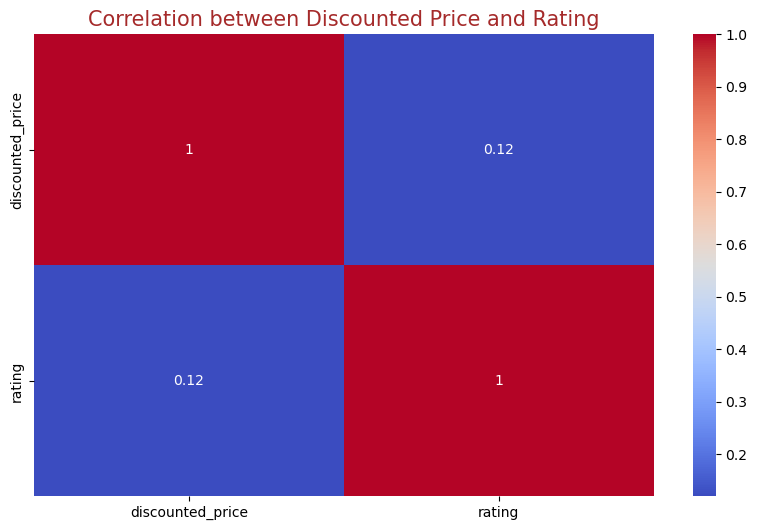

In [236]:
plt.figure(figsize = (10,6))
sns.heatmap(data = corr_dis_rating, annot = True, cmap = 'coolwarm')
plt.title('Correlation between Discounted Price and Rating', fontsize = 15, color = 'brown')
plt.show()

9. What are the Top 5 categories based on the highest ratings.

In [244]:
avg_rating_catg = amazon_df.groupby('category')['rating'].mean()

In [245]:
sorted_rating = avg_rating_catg.sort_values(ascending = False)

In [246]:
#top 5
top_5 = sorted_rating.head(5)

In [248]:
top_5

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64

10. Identify any potential areas for improvement or optimization based on the data analysis

In [ ]:
'''
Improve product quality in low-rated categories.
Optimize pricing and discount strategies for better competitiveness.
Differentiate products in saturated categories with unique features.
Address recurring issues from customer reviews to boost satisfaction.
Promote highly-rated products to increase visibility and sales.
Use insights from top categories as a model for other underperforming ones.

'''

# EDA - 4

In [254]:
spotify_df = pd.read_csv('spotify.csv')

In [259]:
spotify_df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [261]:
spotify_df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [262]:
spotify_df.describe()

,Popularity,Duration (ms)
count,440.000000,440.000000
mean,75.736364,206810.040909
std,9.886534,53576.930289
min,29.000000,81666.000000
25%,70.000000,172778.500000
50%,77.000000,201866.000000
75%,83.000000,235119.750000
max,97.000000,501648.000000


In [271]:
spotify_df.shape

(440, 5)

In [264]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do 
   the needful.

In [265]:
spotify_df.isnull().sum()    ##there is no null valuesvpresent in the dataframe.

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [269]:
spotify_df.duplicated().sum()

27

In [267]:
spotify_df[spotify_df.duplicated()]

,Artist,Track Name,Popularity,Duration (ms),Track ID
39,Travis Scott,MELTDOWN (feat. Drake),86,246133,67nepsnrcZkowTxMWigSbb
52,Travis Scott,TELEKINESIS (feat. SZA & Future),86,353754,1i9lZvlaDdWDPyXEE95aiq
72,21 Savage,née-nah,88,220584,2yUzr8Sr6ldG8vmHhZwTnz
73,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
76,Drake,Rich Flex,85,239359,1bDbXMyjaUIooNwFE9wn0N
131,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
170,Metro Boomin,Trance (with Travis Scott & Young Thug),89,194786,5wG3HvLhF6Y5KTGlK0IW3J
182,D-Block Europe,Overseas,74,222154,337kcYVjYXdLBItCw9ry3b
210,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,87,157560,0RiRZpuVRbi7oqRdSMwhQY
212,Metro Boomin,Annihilate (Spider-Man: Across the Spider-Vers...,79,231746,39MK3d3fonIP8Mz9oHCTBB


In [275]:
spotify_df.drop_duplicates(inplace = True)

In [276]:
spotify_df.shape

(413, 5)

2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

In [281]:
spotify_df['Popularity'].describe()


count    413.000000
mean      75.384988
std        9.789010
min       29.000000
25%       70.000000
50%       76.000000
75%       82.000000
max       97.000000
Name: Popularity, dtype: float64

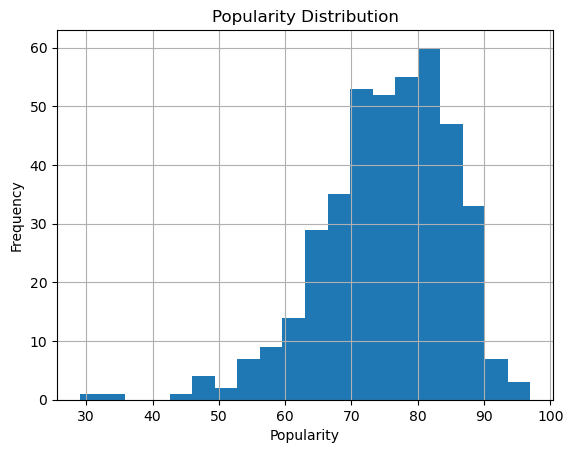

In [282]:
spotify_df['Popularity'].hist(bins=20)
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Insights -- Central Peak: The histogram has a clear peak around the 80s in popularity. This suggests that the majority of tracks in the dataset have high popularity scores, typically ranging from 70 to 90. This could imply that popular tracks tend to dominate in the dataset.

3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

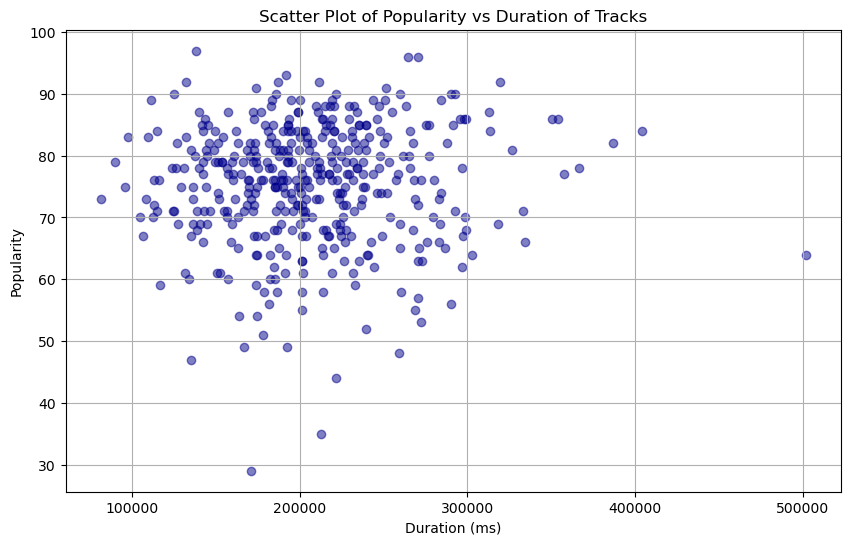

In [285]:

plt.figure(figsize=(10, 6))
plt.scatter(spotify_df['Duration (ms)'], spotify_df['Popularity'], alpha=0.5, color='darkblue')
plt.title('Scatter Plot of Popularity vs Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

In [ ]:
#Insights -- No Strong Correlation: There is no clear linear relationship between the popularity of the tracks and their duration. Tracks of all durations (from around 100,000 ms to 500,000 ms) can be found across the full range of popularity scores (from 50 to 100).

4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using 
   a countplot.

In [292]:
artist_track_count = spotify_df.groupby('Artist')['Track Name'].count()

In [293]:
artist_track_count

Artist
*NSYNC                     1
2 Chainz                   1
21 Savage                 10
A Boogie Wit da Hoodie     1
A$AP Ferg                  1
                          ..
Young Nudy                 1
Young Thug                 4
benny blanco               1
cassö                      1
¥$                        10
Name: Track Name, Length: 115, dtype: int64

In [294]:
most_tracks_artist = artist_track_count.idxmax()

In [297]:
most_tracks_artist

'Drake'

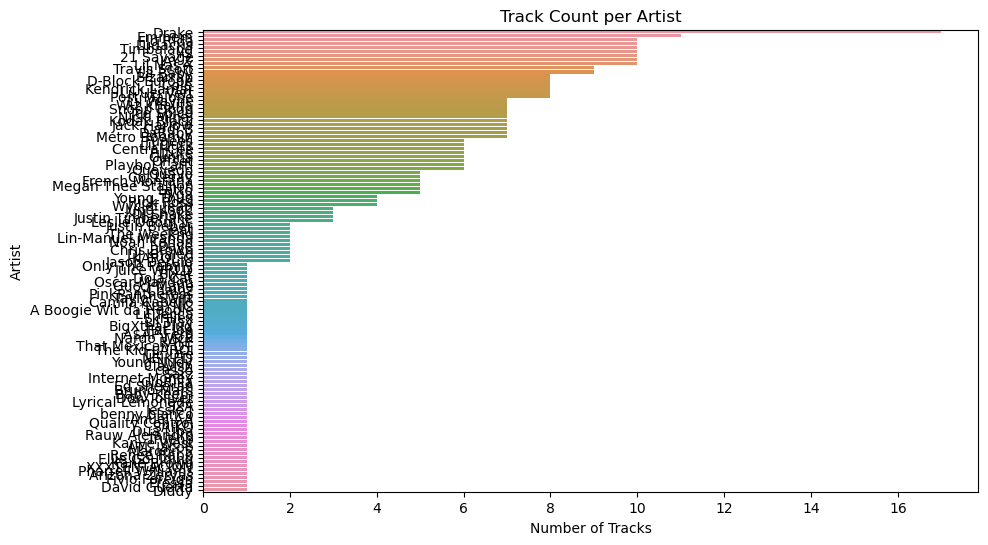

In [302]:
plt.figure(figsize=(10, 6))
sns.countplot(y=spotify_df['Artist'], order=spotify_df['Artist'].value_counts().index)
plt.title('Track Count per Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [306]:
least_popular_tracks = spotify_df.sort_values('Popularity', ascending=True).head(5)
least_popular_tracks

,Artist,Track Name,Popularity,Duration (ms),Track ID
207,Pressa,Attachments (feat. Coi Leray),29,171000,6EfJ8Ct3GHbBz2YlyPnMYb
231,Justin Bieber,Intentions,35,212853,7jAVt70Xdg8EwOtsFB1ZqK
413,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
225,Lil Baby,On Me - Remix,47,135444,2uUFVnVFERNxUdcmvEs7LB
407,Wyclef Jean,911 (feat. Mary J. Blige),48,259333,28hgx2bWXcaBJeC9zVwrBq


In [307]:
# Display the artist name and track name for the top 5 least popular tracks
least_popular_tracks[['Artist', 'Track Name', 'Popularity']]

,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and 
   display the average popularity for each artist.

In [310]:
artist_popularity = spotify_df.groupby('Artist')['Popularity'].mean().sort_values(ascending = False)

In [311]:
artist_popularity

Artist
cassö             92.000000
Trueno            89.000000
David Guetta      87.000000
Travis Scott      86.555556
¥$                85.100000
                    ...    
RAYE              55.000000
Wyclef Jean       54.500000
Arizona Zervas    54.000000
Justin Bieber     49.000000
Pressa            29.000000
Name: Popularity, Length: 115, dtype: float64

In [312]:
top_5_artist = artist_popularity.head(5)

In [313]:
top_5_artist

Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64

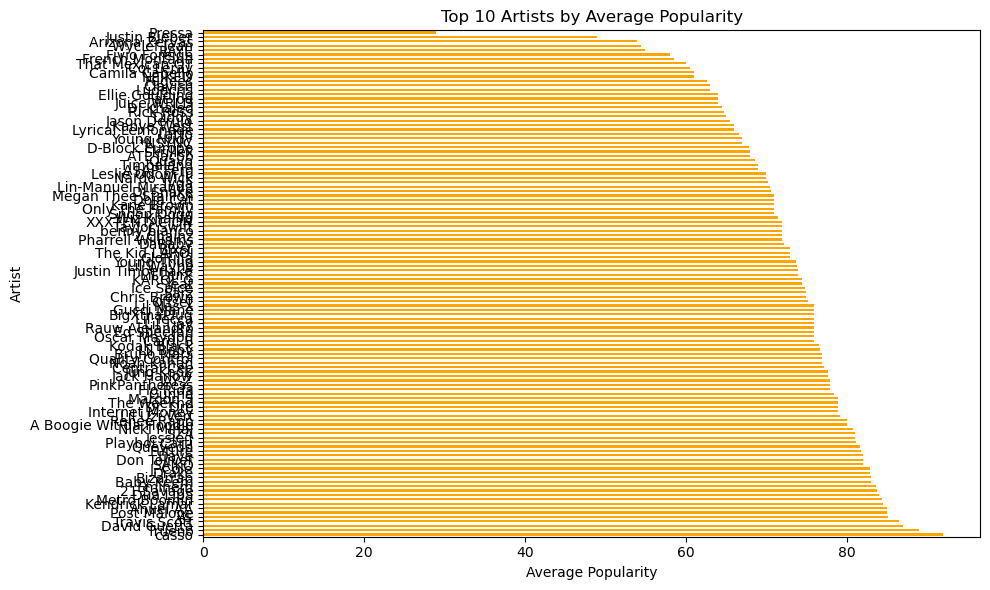

In [320]:
artist_popularity.plot(kind='barh', figsize=(10, 6), color='orange')

# Add labels and title
plt.ylabel('Artist')
plt.xlabel('Average Popularity')
plt.title('Top 10 Artists by Average Popularity')
plt.tight_layout()

# Show the plot
plt.show()

7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

In [321]:
# Calculate average popularity for each artist and get the top 5 artists
top_5_artists = spotify_df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5).index

# Filter the dataset for these top 5 artists
top_5_artist_tracks = spotify_df[spotify_df['Artist'].isin(top_5_artists)]

# Find the most popular track for each artist
most_popular_tracks = top_5_artist_tracks.loc[top_5_artist_tracks.groupby('Artist')['Popularity'].idxmax()]

# Display the artist and their most popular track
print(most_popular_tracks[['Artist', 'Track Name', 'Popularity']])


           Artist                    Track Name  Popularity
200  David Guetta            Baby Don't Hurt Me          87
30   Travis Scott    FE!N (feat. Playboi Carti)          93
241        Trueno  Mamichula - con Nicki Nicole          89
140         cassö                         Prada          92
260            ¥$                      CARNIVAL          96


8. Visualize relationships between multiple numerical variables simultaneously using a pair plot

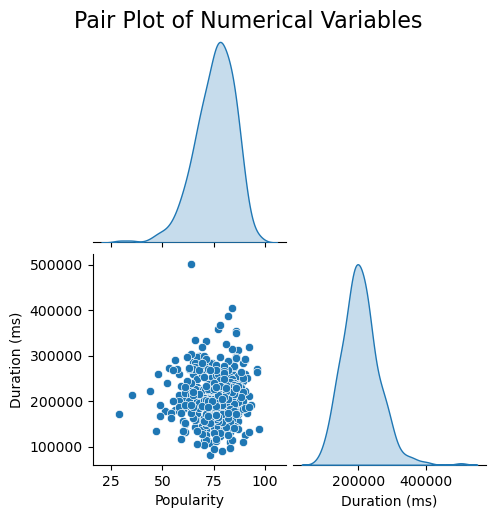

In [322]:
# Select numerical columns for the pair plot
numerical_cols = ['Popularity', 'Duration (ms)']  # Add other numerical columns if available

# Create the pair plot
sns.pairplot(spotify_df[numerical_cols], diag_kind='kde', kind='scatter', corner=True, palette='coolwarm')

# Add a title
plt.suptitle('Pair Plot of Numerical Variables', y=1.02, fontsize=16)

# Show the plot
plt.show()


9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or 
   violin plot.

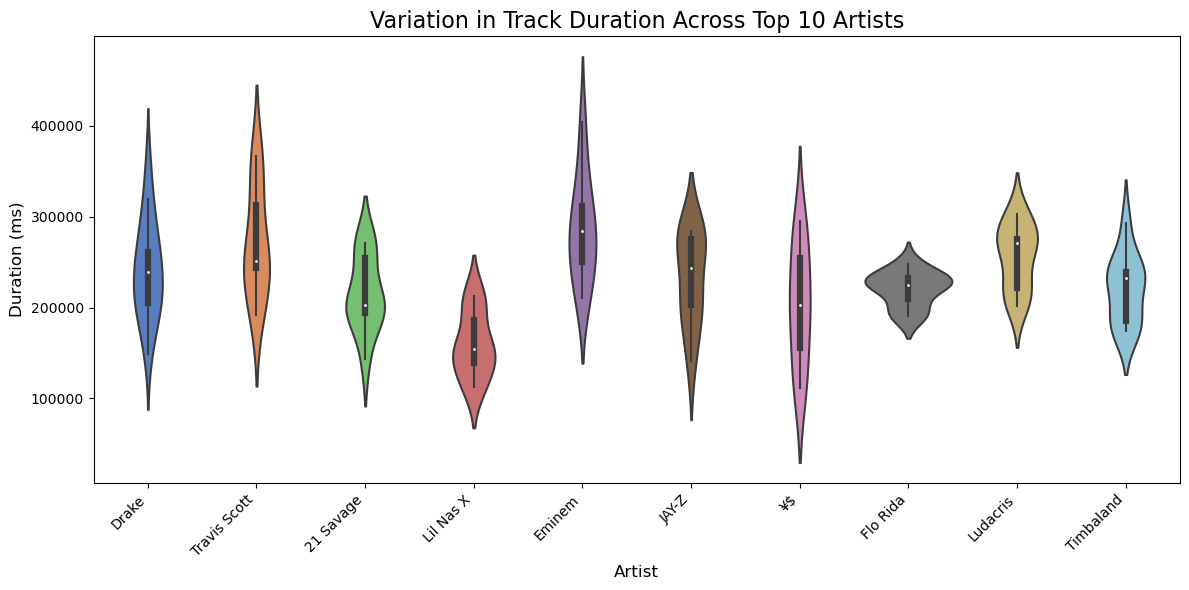

In [323]:
# Filter the top 10 artists with the most tracks
top_artists = spotify_df['Artist'].value_counts().head(10).index
filtered_data = spotify_df[spotify_df['Artist'].isin(top_artists)]

# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Duration (ms)', data=filtered_data, palette='muted')

# Customize plot
plt.title('Variation in Track Duration Across Top 10 Artists', fontsize=16)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Duration (ms)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a 
    violin plot.

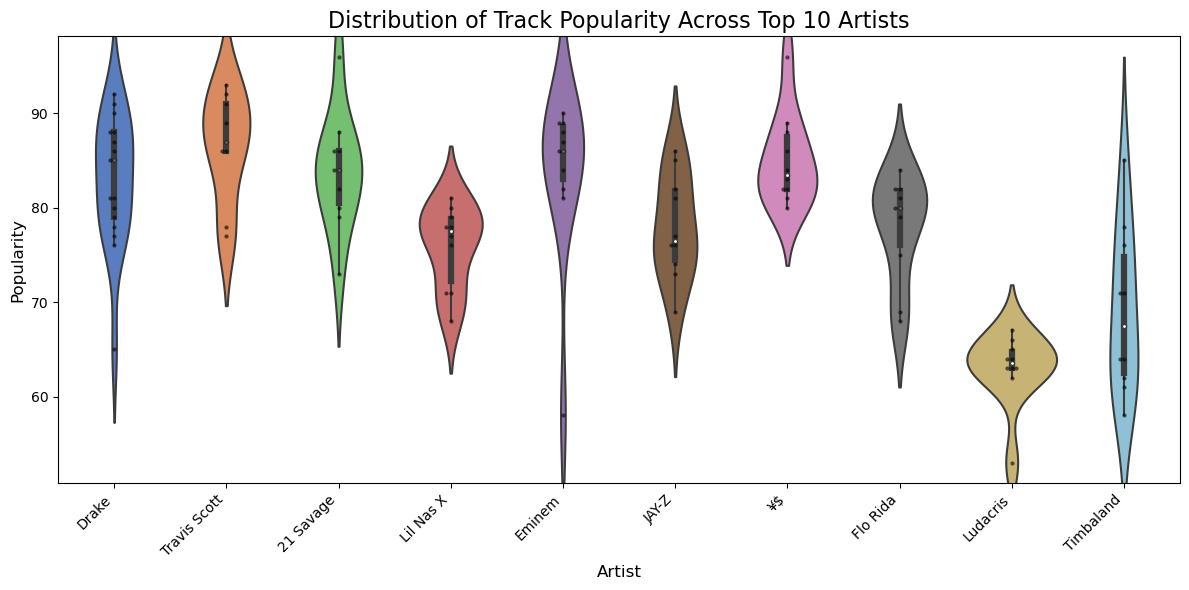

In [324]:
# Filter the top 10 artists with the most tracks
top_artists = spotify_df['Artist'].value_counts().head(10).index
filtered_data = spotify_df[spotify_df['Artist'].isin(top_artists)]

# Create a violin plot to show popularity distribution
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity', data=filtered_data, palette='muted')

# Optionally, add a swarm plot for detailed points
sns.swarmplot(x='Artist', y='Popularity', data=filtered_data, color='k', size=3, alpha=0.6)

# Customize plot
plt.title('Distribution of Track Popularity Across Top 10 Artists', fontsize=16)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()